# Classification with Decision Trees

## Objectives
* Describe decision trees to solve supervised classification problems.
* Understand the idea and maths behind calculating entropy and information gain. 
* Calculate entropy for a simple toy problem to build a DT.
---

### Decision Trees
Decision trees are tree structured (i.e. having a hierarchy), supervised learning algorithm that are mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the data into two or more homogeneous sets based on most significant differentiator in input variables. A decision tree can be used to visually and explicitly represent decisions and decision making so it remains highly explainable. DTs are highly popular tools in data mining, statistics for deriving a strategy to reach a particular goal. In this lesson, we shall focus on predictive abilities of a decision tree in the context of Machine Learning. 

Following is a simple decision tree highlighting and visualizing decisions that most of us have to make every morning :)

![](exampletree.jpg)




## Decision Tree Terminology

Following the intuition from the above figure, let's try to identify different nodes/edges and levels of heirarchy in a tree. 


#### Root Node: 
A root node is a the top of hierarchy and is responisble for creating a first split on the given data. It divides the data based on two or more homogeneous sets (depending upon classes in the given variable).
#### Splitting: 
Splitting is the term given to the process of dividing a node into two or more sub-nodes.
#### Decision Node: 
The decision node (in yellow below) decides whether to split the data into further sub-nodes or not
#### Leaf: 
Leaf nodes exist at the lowest end on the hierachy in a brach and do not split any further highlighting that the model can not go any further. 



![](tree_term.jpg)

## Building a decision tree

The process of training a decision tree and predicting the target features is as follows:

1. Present a dataset containing of a number of training instances characterized by a number of descriptive features and a target feature.

2. Train the decision tree model by continuously splitting the target feature along the values of the descriptive features using a measure of information gain during the training process.

3. Grow the tree until we accomplish a stopping criteria i.e. create leaf nodes which represent the predictions we want to make for a new instance.

4. Show new instances to the tree and run down the tree until we arrive at leaf nodes.

5. DONE.

![](dtprocess.png)

From above figure , following provides a good intuition for building a decision tree. 

>*Given a dataset, train a model which learns the relationship between the descriptive features and a target feature. We can then present the model with new, unseen instances and predict the target feature values for these.*

At this stage, it must be highlighted that selection of root nodes and splitting decisions are not totally random processes. We need to take a quick dive into some simple mathematics around informatiom theoratic concepts of **ENTROPY** and **INFORMATION GAIN** which would help us answer following questions. 

* Which attribute should be chosen as for being the Root/Parent Node?
* When should we split / not split the data any further ?

You should also remember that decision trees can be used for classification as well as regression problems. In this lab, we are focusing on classification only as regression will be covered during a later session. 

## Entropy

Entropy is a measure of uncertainty, and highlights unpredictability of a state, or equivalently, of its average information content. Entropy is a statistical metric that measures the impurity. Given a dataset S, which contains two classes: Positive and Negative, of some arbitrary target concept, entropy with respect to this boolean classification is:

>** Entropy(S) = -p(positive)log2 p(positive) — p(negative) log2 p(negative)**

where 

* p(positive) is the probability of positive examples in S.

* p(negative) is the proportion of negative examples in S. 

**Notice that the entropy is 0 if all members of S belong to the same class. For example, if all members are positive (p+ = 1), then p- is 0, and Entropy(S) = -1. log2(1) – 0. log2 0 = -1. 0 – 0. log2 0 = 0.**

The entropy is 1 when the collection contains an equal number of positive and negative examples.

If the collection contains unequal numbers of positive and negative examples, the entropy is between 0 and 1.

![](ent_prob.png)

Another intuition for understanding entropy is that, entropy specifies the minimum number of bits required to encode the classification of any member of a collection S. In general the entropy of a variable x is given as:
![](ent.jpg)

## Information Gain

Information gain is a metric that measures the expected reduction in the impurity of the collection S, caused by splitting the data according to any given attribute. Whilst building the decision tree, the information gain metric is used to select the best attribute i.e. the attribute the provides the “best split” at each level.

IG measures the expected reduction in entropy and decides which attribute goes into a decision node. To minimise the decision tree depth, the attribute with the most entropy reduction is chosen by the DT algorithm.

More precisely, the information gain Gain(S, A) of an attribute A relative to a collection of examples S is defined as:
![](IG.png)

* S = Each value v of all possible values of attribute A
* Sv = Subset of S for which attribute A has value v
* |Sv| = Number of elements in Sv
* |S| = Number of elements in S


Let's see above mathamatical descriptions in action with a simple decision "SHOULD I PLAY BASEBALL?" as shown below:

In [31]:
import pandas as pd 
baseball = pd.read_csv('baseball.csv', header = 1)
baseball.columns
print(baseball)

    Day   Outlook Temperature Humidity    Wind Should I play baseball?
0    D1     Sunny         Hot     High    Weak                      No
1    D2     Sunny         Hot     High  Strong                      No
2    D3  Overcast         Hot     High    Weak                     Yes
3    D4      Rain        Mild     High    Weak                     Yes
4    D5      Rain        Cool   Normal    Weak                     Yes
5    D6      Rain        Cool   Normal  Strong                      No
6    D7  Overcast        Cool   Normal  Strong                     Yes
7    D8     Sunny        Mild     High    Weak                      No
8    D9     Sunny        Cool   Normal    Weak                     Yes
9   D10      Rain        Mild   Normal    Weak                     Yes
10  D11     Sunny        Mild   Normal  Strong                     Yes
11  D12  Overcast        Mild     High  Strong                     Yes
12  D13  Overcast         Hot   Normal    Weak                     Yes
13  D1

At this stage, it is a good practice to explicitly specify the columns which are categorical using `.astype()` method.

In [32]:
for column in baseball.columns:
    baseball[column] = baseball[column].astype('category')
baseball.describe()

,Day,Outlook,Temperature,Humidity,Wind,Should I play baseball?
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D9,Sunny,Mild,Normal,Weak,Yes
freq,1,5,6,7,8,9


We need to find which attribute will be the root node in our decision tree.

STEP 1 : Calculate the total entropy

In [33]:
baseball['Should I play baseball?'].value_counts()

Yes    9
No     5
Name: Should I play baseball?, dtype: int64

### Initial Entropy

In [34]:
import math
Ent_S = -(9/14)*math.log((9/14),2) - (5/14)*math.log((5/14),2) 
print (Ent_S)

0.9402859586706309


### The Root Node

Check out Wind to be root node:

In [35]:
baseball['Wind'].value_counts()

Weak      8
Strong    6
Name: Wind, dtype: int64

In [41]:
Entropy_S_weak = - (6/8)*math.log((6/8),2) - (2/8)*math.log((2/8),2) 
print (Entropy_S_weak )
Entropy_S_strong = - (3/6)*math.log((3/6),2) - (3/6)*math.log((3/6),2)
print (Entropy_S_strong)

Gain_S_wind = Ent_S - (8/14)* Entropy_S_weak - (6/14)* Entropy_S_strong


0.8112781244591328
1.0


In [42]:
Gain_S_wind 

0.04812703040826932

In [46]:
Gain_S_outlook = 0.246
Gain_S_temperature = 0.029
Gain_S_humidity = 0.151

Clearly, the outlook attribute has the highest gain. Therefore, it is used as the decision attribute in the root node.

In [47]:
baseball['Outlook'].value_counts()

Sunny       5
Rain        5
Overcast    4
Name: Outlook, dtype: int64

Since outlook has three possible values, the root node has three branches (sunny, overcast, rain). 

The next question is, What attribute should be tested at the sunny branch node? Since we've used outlook at the root, we only decide on the remaining three attributes: humidity, temperature, or wind.

Ssunny = {D1, D2, D8, D9, D11} = 5 examples from the table with outlook = sunny

Gain_Ssunny_humidity = 0.970

Gain_Ssunny_temperature = 0.570

Gain_Ssunny_Wind = 0.019

Humidity has the highest gain; therefore, it is used as the decision node. This process goes on until all data is classified perfectly or we run out of attributes.

![](finaltree.gif)

The decision tree can also be expressed in rule format:

IF `outlook = sunny` AND `humidity = high` THEN `play baseball = no`

IF `outlook = rain` AND `humidity = high` THEN `play baseball = no`

IF `outlook = rain` AND `wind = strong` THEN `play baseball = yes`

IF `outlook = overcast` THEN `play baseball = yes`

IF `outlook = rain` AND `wind = weak` THEN `play baseball = yes`

That’s all mathematical understanding you need to understand Decision Tree. If you think this concept is overwhelming then don’t be. Take it as a learning process like any other skills to learn you need to give some Time & constant Motivation.

In [3]:
from sklearn.datasets import *
from sklearn import tree
import graphviz 

wine = load_wine() #import dataset
clf = tree.DecisionTreeClassifier(criterion= 'entropy') # init the tree
clf = clf.fit(wine.data, wine.target) # Train the tree
# export the trained decision tree
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=wine.feature_names,
                         class_names=wine.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("wine") # tree saved to wine.pdf


'wine.pdf'

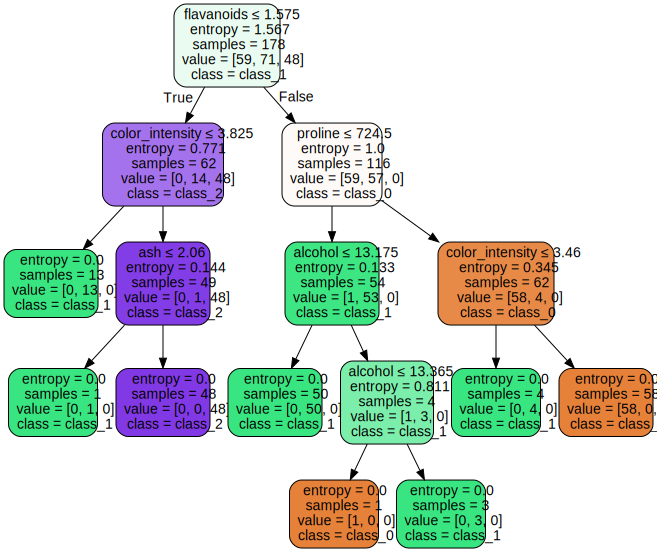

In [4]:
graph